# Análise de Dados


In [5]:
# Importação de bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Leitura do arquivo csv

df = pd.read_csv('base-alugueis-sp.csv', sep= ',')
df

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200


In [3]:
# Tipo dados 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [150]:
# Quantidade de imóveis existentes por tipo 

df.type.unique()
df.type.value_counts()

Apartamento           7194
Casa                  2841
Studio e kitnet       1381
Casa em condomínio     241
Name: type, dtype: int64

In [151]:
# Percentual de imóveis existentes por tipo 

df.type.unique()
df.type.value_counts(normalize = True)

Apartamento           0.617140
Casa                  0.243716
Studio e kitnet       0.118470
Casa em condomínio    0.020674
Name: type, dtype: float64

In [152]:
# Média área

df.area.mean()

84.65565754482286

In [153]:
# Valor por m2

def valor_m2(total, area):
    return (total/area)

valor_por_m2 = valor_m2(df.total, df.area).round(2)
valor_por_m2.head()


0    139.95
1     89.67
2    258.94
3     34.89
4    244.95
dtype: float64

In [154]:
# Criar coluna 'valor_por_m2'no dataframe

df['valor_por_m2'] = valor_por_m2


In [155]:
df.head()

,address,district,area,bedrooms,garage,type,rent,total,valor_por_m2
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939,139.95
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,89.67
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661,258.94
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954,34.89
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654,244.95


In [156]:
# Média de valor por tipo de habitação

df.groupby('type')[['total']].mean().sort_values('total')

,total
type,
Studio e kitnet,2668.280232
Casa,3824.244280
Apartamento,4435.428413
Casa em condomínio,4576.232365


In [157]:
# Média de valor por m2 por tipo de habitação

df.groupby('type')[['valor_por_m2']].mean().sort_values('valor_por_m2')

,valor_por_m2
type,
Casa em condomínio,85.163900
Studio e kitnet,90.522723
Apartamento,inf
Casa,inf


In [158]:
# Filtrar os dados que correspondem a apartamento para análise do 'inf'

df.query('type == "Apartamento"')


,address,district,area,bedrooms,garage,type,rent,total,valor_por_m2
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661,258.94
5,Rua Domingos Paiva,Brás,50,2,1,Apartamento,3800,4587,91.74
6,Rua Guararapes,Brooklin Paulista,72,2,1,Apartamento,3500,5187,72.04
8,Rua José Peres Campelo,Piqueri,32,2,0,Apartamento,1200,1592,49.75
9,Rua Guaperuvu,Vila Aricanduva,36,1,0,Apartamento,1200,1501,41.69
...,...,...,...,...,...,...,...,...,...
11651,São José,Alto da Boa Vista,158,4,2,Apartamento,6500,8929,56.51
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778,61.47
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480,49.94
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467,65.08


In [159]:
# Verificar se há valores infinitos

valores_infinitos = df[df['valor_por_m2'].isin([float('inf'), float('-inf')])]
valores_infinitos


,address,district,area,bedrooms,garage,type,rent,total,valor_por_m2
2983,Rua Relíquia,Jardim das Laranjeiras,0,2,1,Apartamento,1600,2569,inf
7085,Rua Edmundo de Amicis,Morumbi,0,3,2,Casa,3200,3351,inf


In [160]:
# Verificar se há valores nulos (NaN)

df[df['valor_por_m2'].isna()]

,address,district,area,bedrooms,garage,type,rent,total,valor_por_m2


In [161]:
# Filtrar o DataFrame para remover as linhas 'valores_infinitos' (não funcionou)

df = df[~df['valor_por_m2'].isin(valores_infinitos)]

In [162]:
# Usar o método de indice para exclusão dos dados que possuem valor infinito

indices_para_excluir = [2983, 7085]
df = df.drop(indices_para_excluir)

In [163]:
# Média de valor por m2 por tipo de habitação

df.groupby('type')[['valor_por_m2']].mean().sort_values('valor_por_m2')

,valor_por_m2
type,
Casa,30.186905
Apartamento,62.780341
Casa em condomínio,85.163900
Studio e kitnet,90.522723


In [164]:
# Alterar o tipo de dados do rent e total

df[['rent', 'total']] = df[['rent', 'total']].astype(float)

In [165]:
# Calcular o valor do aluguel por ano

df['total_ano'] = df.total * 12
df.head()

,address,district,area,bedrooms,garage,type,rent,total,valor_por_m2,total_ano
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400.0,2939.0,139.95,35268.0
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030.0,1345.0,89.67,16140.0
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000.0,4661.0,258.94,55932.0
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750.0,1954.0,34.89,23448.0
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000.0,4654.0,244.95,55848.0


In [166]:
df['descricao'] = df['type'] + ' em ' + df['district']
df.head()

,address,district,area,bedrooms,garage,type,rent,total,valor_por_m2,total_ano,descricao
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400.0,2939.0,139.95,35268.0,Studio e kitnet em Belenzinho
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030.0,1345.0,89.67,16140.0,Studio e kitnet em Vila Marieta
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000.0,4661.0,258.94,55932.0,Apartamento em Pinheiros
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750.0,1954.0,34.89,23448.0,Casa em condomínio em Vila Ré
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000.0,4654.0,244.95,55848.0,Studio e kitnet em Bela Vista


In [167]:
# Estatística descritiva dos dados

df.describe().round(2)

,area,bedrooms,garage,rent,total,valor_por_m2,total_ano
count,11655.00,11655.00,11655.00,11655.00,11655.00,11655.00,11655.00
mean,84.67,1.97,1.06,3250.96,4080.22,58.59,48962.67
std,74.02,0.93,1.13,2650.89,3352.73,115.81,40232.78
min,1.00,0.00,0.00,500.00,509.00,4.52,6108.00
25%,40.00,1.00,0.00,1590.00,1996.00,33.23,23952.00
50%,60.00,2.00,1.00,2415.00,3057.00,48.10,36684.00
75%,96.00,3.00,2.00,3800.00,4774.50,70.00,57294.00
max,580.00,6.00,6.00,25000.00,28700.00,11420.00,344400.00


In [168]:
# Correlação dos dados

df.corr().round(4)

,area,bedrooms,garage,rent,total,valor_por_m2,total_ano
area,1.0000,0.7281,0.7336,0.6672,0.6521,-0.1027,0.6521
bedrooms,0.7281,1.0000,0.6569,0.5312,0.5260,-0.0737,0.5260
garage,0.7336,0.6569,1.0000,0.6173,0.6180,-0.0155,0.6180
rent,0.6672,0.5312,0.6173,1.0000,0.9781,0.1201,0.9781
total,0.6521,0.5260,0.6180,0.9781,1.0000,0.1241,1.0000
valor_por_m2,-0.1027,-0.0737,-0.0155,0.1201,0.1241,1.0000,0.1241
total_ano,0.6521,0.5260,0.6180,0.9781,1.0000,0.1241,1.0000


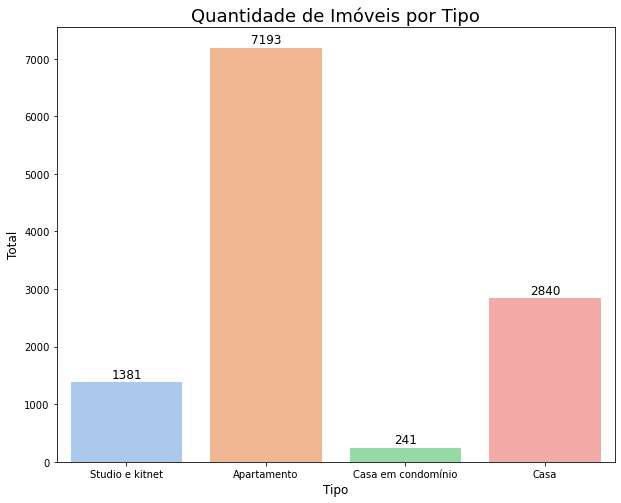

In [183]:
# Gráfico de Quantidade de Imóveis por Tipo

plt.figure(figsize=(10, 8))
ax = sns.countplot(x='type', data=df, palette='pastel')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 8),
                textcoords='offset points')

ax.set_title('Quantidade de Imóveis por Tipo', fontsize=18)
ax.set_xlabel('Tipo', fontsize=12)
ax.set_ylabel('Total', fontsize=12)

plt.show()